This dataset contains management information on schools and the outcomes of their Ofsted inspections. There are four
Ofsted ratings: Outstanding, Good, Requires Improvement and Inadequate. The dataset also contains information on where
the school is located, its religious character and when the inspections took place. We'll use the data to make to look at where
inequalities might lie in the education system.

In [2]:
# First, read in the data and the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read the data csv file into a variable called "schools"
schools = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\Ofsted inspections.csv", encoding = 'unicode_escape')
# Inspect the first few rows of the dataset
schools.head()

,Web link,URN,LAESTAB,School name,Ofsted phase,Type of education,School open date,Admissions policy,Sixth form,Designated religious character,...,School type at time of previous full inspection,Previous full inspection overall effectiveness,Previous category of concern,Previous quality of education,Previous behaviour and attitudes,Previous personal development,Previous effectiveness of leadership and management,Previous safeguarding is effective?,Previous early years provision (where applicable),Previous sixth form provision (where applicable)
0,http://www.ofsted.gov.uk/inspection-reports/fi...,100000,2013614,Sir John Cass's Foundation Primary School,Primary,Voluntary Aided School,NaN,Not applicable,Does not have a sixth form,Church of England,...,Voluntary Aided School,1.0,NaN,9.0,9.0,9.0,1.0,9,1.0,9.0
1,http://www.ofsted.gov.uk/inspection-reports/fi...,100005,2021048,Thomas Coram Centre,Nursery,LA Nursery School,NaN,Not applicable,Not applicable,Does not apply,...,LA Nursery School,1.0,NaN,9.0,9.0,9.0,1.0,9,1.0,9.0
2,http://www.ofsted.gov.uk/inspection-reports/fi...,100006,2021100,CCfL Key Stage 4 PRU,PRU,Pupil Referral Unit,01/09/1999,Not applicable,Not applicable,Does not apply,...,Pupil Referral Unit,2.0,NaN,9.0,9.0,9.0,2.0,9,9.0,9.0
3,http://www.ofsted.gov.uk/inspection-reports/fi...,100007,2021101,Camden Primary Pupil Referral Unit,PRU,Pupil Referral Unit,NaN,Not applicable,Not applicable,Does not apply,...,Pupil Referral Unit,2.0,NaN,9.0,9.0,9.0,2.0,9,9.0,9.0
4,http://www.ofsted.gov.uk/inspection-reports/fi...,100008,2022019,Argyle Primary School,Primary,Community School,NaN,Not applicable,Does not have a sixth form,Does not apply,...,Community School,2.0,NaN,9.0,9.0,9.0,2.0,9,2.0,9.0


In [3]:
# Let's see what our columns are
print(schools.columns)

Index(['Web link', 'URN', 'LAESTAB', 'School name', 'Ofsted phase',
       'Type of education', 'School open date', 'Admissions policy',
       'Sixth form', 'Designated religious character', 'Religious ethos',
       'Faith grouping', 'Ofsted region', 'Region', 'Local authority',
       'Parliamentary constituency', 'Postcode',
       'The income deprivation affecting children index (IDACI) quintile',
       'Total number of pupils',
       'Latest section 8 inspection number since last full inspection',
       'Does the section 8 inspection relate to the URN of the current school?',
       'URN at time of the section 8 inspection',
       'LAESTAB at time of the section 8 inspection',
       'School name at time of the latest section 8 inspection',
       'School type at time of the latest section 8 inspection',
       'Number of section 8 inspections since the last full inspection',
       'Date of latest section 8 inspection',
       'Section 8 inspection publication date',
       

This is a large number of columns to deal with! For the moment, we'll make a dataframe with some of the columns we know we want
to use for analysis. We'll start by looking at how the type of school, it's location, income deprivation, and size of school affect
their Ofsted ratings. We may make other dataframes later to look at other features, so we'll call this one schools_1.

In [4]:
schools_1 = schools[["Type of education", "Region", "The income deprivation affecting children index (IDACI) quintile", "Total number of pupils"]]
schools_1.head()

,Type of education,Region,The income deprivation affecting children index (IDACI) quintile,Total number of pupils
0,Voluntary Aided School,London,4.0,285.0
1,LA Nursery School,London,NaN,133.0
2,Pupil Referral Unit,London,NaN,52.0
3,Pupil Referral Unit,London,NaN,19.0
4,Community School,London,5.0,350.0


In [5]:
# Check our dataframe for null values
schools_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21970 entries, 0 to 21969
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Type of education                                                 21970 non-null  object 
 1   Region                                                            21970 non-null  object 
 2   The income deprivation affecting children index (IDACI) quintile  20939 non-null  float64
 3   Total number of pupils                                            21666 non-null  float64
dtypes: float64(2), object(2)
memory usage: 686.7+ KB


We've got over 20,000 values. "Total number of pupils" is only missing around 300, so we will just replace those with the average.
The IDACI columns is missing around 5% of values - this is still not significant and so we can replace with the average
First we'll rename the IDACI column to IDACI so it's easier to work with (otherwise the name is too long)

In [6]:
schools_1.rename(columns={"The income deprivation affecting children index (IDACI) quintile": "IDACI"}, inplace=True)
schools_1["IDACI"].fillna(schools_1["IDACI"].mean(), inplace=True)
schools_1["Total number of pupils"].fillna(schools_1["Total number of pupils"].mean(), inplace=True)
schools_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21970 entries, 0 to 21969
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type of education       21970 non-null  object 
 1   Region                  21970 non-null  object 
 2   IDACI                   21970 non-null  float64
 3   Total number of pupils  21970 non-null  float64
dtypes: float64(2), object(2)
memory usage: 686.7+ KB


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


We now have no null objects in our dataframe and can start to look at correlations between the features. Before doing that, we should clarify what "IDACI" is. It measures the proportion of all children aged 0 to 15 living in 
income deprived families. The more deprived an area, the higher its score but the lower the rank, so the first quintile will be the most deprived.Let's start by inspecting the types of education and region columns, as this is categorical data
for which we don't know the categories

In [8]:
schools_1["Type of education"].value_counts()


Community School                             6274
Academy Converter                            5843
Voluntary Aided School                       2851
Academy Sponsor Led                          2306
Voluntary Controlled School                  1719
Foundation School                             722
Community Special School                      524
Free School                                   392
LA Nursery School                             389
Academy Special Converter                     272
Pupil Referral Unit                           202
Foundation Special School                      86
Academy Alternative Provision Converter        72
Academy Special Sponsor Led                    68
Non-Maintained Special School                  58
University Technical College                   48
Free School - Alternative Provision            46
Free School Special                            44
Academy Alternative Provision Sponsor Led      27
Studio School                                  24


There are five types of school that dominate here: Community, Academy Converter, Voluntatry Aided, Academy Sponsor Led and
Voluntary Controlled School. We'll focus on these schools first to see which gets the best Ofsted ratings.

In [11]:
types = pd.concat([schools_1["Type of education"], schools["Overall effectiveness"]], axis=1)
types.head()

,Type of education,Overall effectiveness
0,Voluntary Aided School,1.0
1,LA Nursery School,1.0
2,Pupil Referral Unit,2.0
3,Pupil Referral Unit,2.0
4,Community School,2.0


Let's make separate dataframes for each of the five types of school, with abbreviations for each type to make it easier. We 
can then print the mean Ofsted rating for each type of school to give a first look at which type does best.

In [17]:
cs = types[types["Type of education"] == "Community School"]
ac = types[types["Type of education"] == "Academy Converter"]
vas = types[types["Type of education"] == "Voluntary Aided School"]
asl = types[types["Type of education"] == "Academy Sponsor Led"]
vcs = types[types["Type of education"] == "Voluntary Controlled School"]
dataframes = [cs, ac, vas, asl, vcl]
for dataframe in dataframes:
    mean = dataframe["Overall effectiveness"].mean()
    print(mean)



1.954393238717908
1.9069249228659582
1.900878734622144
2.574727668845316
1.9557367501456029


They're remarkably close in average rating, apart from academies (i.e. those that have always been academies), who average
around 0.6 lower. Let's look at the distribution of each type of school's ratings to see if this shows anything interesting.

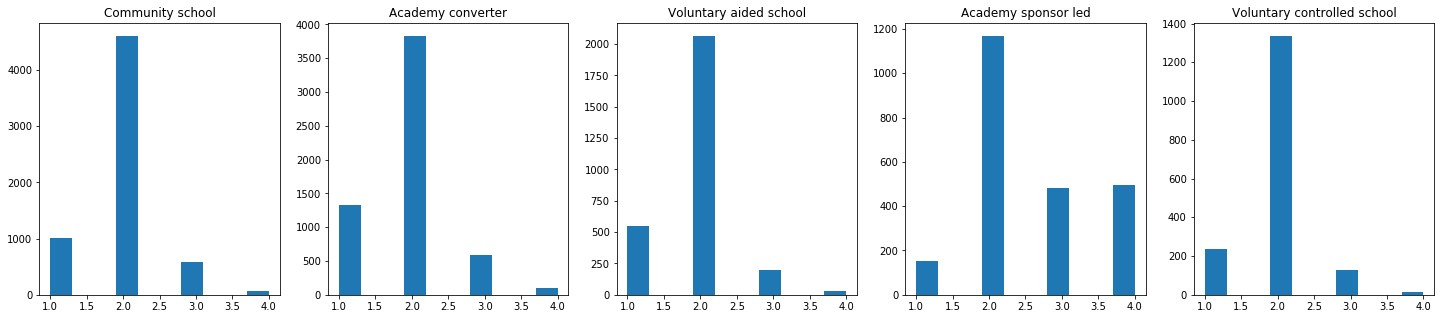

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(25,5))
ax1.hist(cs["Overall effectiveness"])
ax1.set_title("Community school")
ax2.hist(ac["Overall effectiveness"])
ax2.set_title("Academy converter")
ax3.hist(vas["Overall effectiveness"])
ax3.set_title("Voluntary aided school")
ax4.hist(asl["Overall effectiveness"])
ax4.set_title("Academy sponsor led")
ax5.hist(vcs["Overall effectiveness"])
ax5.set_title("Voluntary controlled school")
plt.show()


Academies have a large proportion of schools rated "requires improvement" or "inadequate", which is what pulls the average down
The other types of school have similar distributions.

In [24]:
# Now let's look at how the number of pupils in a schools affects performance. We'll create a new dataframe to do this
pupils = pd.concat([schools_1["Total number of pupils"], schools["Overall effectiveness"]], axis=1)
pupils.head()

,Total number of pupils,Overall effectiveness
0,285.0,1.0
1,133.0,1.0
2,52.0,2.0
3,19.0,2.0
4,350.0,2.0


In [25]:
pupils["Total number of pupils"].describe()

count    21970.000000
mean       375.110265
std        337.818131
min          0.000000
25%        169.000000
50%        259.000000
75%        446.000000
max       2953.000000
Name: Total number of pupils, dtype: float64

The max is nearly 3,000 pupils - we could do qunitles as we have seen earlier. It also tells us the minimum is 0 - we should remove theserows as we don't want values for a school with pupils

In [26]:
pupils = pupils[pupils["Total number of pupils"] != 0]
pupils["Total number of pupils"].describe()

count    21969.000000
mean       375.127339
std        337.816339
min          1.000000
25%        169.000000
50%        259.000000
75%        446.000000
max       2953.000000
Name: Total number of pupils, dtype: float64

In [32]:
quintiles = ["Q1", "Q2", "Q3", "Q4", "Q5"]
pupils["Quintile"] = pd.cut(pupils["Total number of pupils"], bins=5, labels = quintiles)
pupils.head()


,Total number of pupils,Overall effectiveness,Quintile
0,285.0,1.0,Q1
1,133.0,1.0,Q1
2,52.0,2.0,Q1
3,19.0,2.0,Q1
4,350.0,2.0,Q1


In [37]:
for quintile in quintiles:
    means = []
    df = pupils[pupils["Quintile"] == quintile]
    mean = df["Overall effectiveness"].mean()
    means.append(mean)
    print(means)
        

[1.982721619985693]
[2.0560278207109737]
[1.8544444444444443]
[1.6636363636363636]
[1.8]


In [46]:
# We generally get better scores the bigger the school, although that is not always true. We should see if we get better results
# with smaller bins
bin_number = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pupils.drop(["Quintile"], axis=0, inplace=True)
pupils["Bin"] = pd.cut(pupils["Total number of pupils"], bins=10, labels=bin_number)

KeyError: "['Quintile'] not found in axis"

In [53]:
pupils.head()
for b in bin_number:
    means = []
    df = pupils[pupils["Bin"] == b]
    mean = df["Overall effectiveness"].mean()
    means.append(mean)
    print(means)

[1.9458865308193118]
[2.0513709423258746]
[2.069452980946527]
[2.033298647242456]
[1.8651685393258426]
[1.8303249097472925]
[1.6511627906976745]
[1.7083333333333333]
[1.6666666666666667]
[2.0]


In [54]:
bins = pd.series(bin_number)
averages = pd.series(means)
plt.hist(bins, averages)
plt.show()


AttributeError: module 'pandas' has no attribute 'series'